### Reading Data

In [1]:
import pandas as pd

train_df = pd.read_csv("new_train.csv", index_col=0)
test_df = pd.read_csv("new_test.csv", index_col=0)

print("Train size", len(train_df))
print("Test size", len(test_df))
train_df.head(n=3)

Train size 3969
Test size 997


,medical_specialty,transcription,labels
0,Emergency Room Reports,"REASON FOR THE VISIT:, Very high PT/INR.,HIST...",0
1,Surgery,"PREOPERATIVE DIAGNOSIS:, Acetabular fracture ...",1
2,Surgery,"NAME OF PROCEDURE,1. Selective coronary angio...",1


### Train Set Label Distribution

In [2]:
print(train_df["medical_specialty"].value_counts())
print(train_df["labels"].value_counts())


 Surgery                          863
 Consult - History and Phy.       410
 Cardiovascular / Pulmonary       309
 Orthopedic                       289
 Radiology                        213
 General Medicine                 209
 Gastroenterology                 176
 Neurology                        170
 SOAP / Chart / Progress Notes    135
 Urology                          134
 Obstetrics / Gynecology          123
 Discharge Summary                 87
 ENT - Otolaryngology              82
 Neurosurgery                      71
 Hematology - Oncology             68
 Ophthalmology                     67
 Emergency Room Reports            63
 Nephrology                        63
 Pediatrics - Neonatal             55
 Pain Management                   54
 Psychiatry / Psychology           45
 Office Notes                      38
 Podiatry                          35
 Dermatology                       21
 Dentistry                         21
 Cosmetic / Plastic Surgery        19
 Letters    

In [3]:
train_df["labels"].value_counts()

1     863
16    410
7     309
6     289
2     213
10    209
5     176
4     170
13    135
20    134
19    123
21     87
9      82
18     71
11     68
27     67
0      63
8      63
30     55
34     54
15     45
25     38
3      35
23     21
29     21
12     19
24     19
33     16
31     16
32     15
35     12
14     12
37     12
38      9
28      8
22      7
17      6
36      6
39      6
26      5
Name: labels, dtype: int64

# Exploratory Analysis:

In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.manifold import TSNE

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 

from imblearn.over_sampling import SMOTE


In [5]:
print(train_df.columns)
train_df.head(5)
train_df = train_df[train_df['transcription'].notna()]

# prints category amounts
data_categories  = train_df.groupby(train_df['medical_specialty'])
i = 1
print('===========Original Categories =======================')
for catName,dataCategory in data_categories:
    print('Cat:'+str(i)+' '+catName + ' : '+ str(len(dataCategory)) )
    i = i+1
print('==================================')

Index(['medical_specialty', 'transcription', 'labels'], dtype='object')
===========Original Categories =======================
Cat:1  Allergy / Immunology : 6
Cat:2  Autopsy : 7
Cat:3  Bariatrics : 15
Cat:4  Cardiovascular / Pulmonary : 309
Cat:5  Chiropractic : 12
Cat:6  Consult - History and Phy. : 410
Cat:7  Cosmetic / Plastic Surgery : 19
Cat:8  Dentistry : 21
Cat:9  Dermatology : 21
Cat:10  Diets and Nutritions : 9
Cat:11  Discharge Summary : 87
Cat:12  ENT - Otolaryngology : 82
Cat:13  Emergency Room Reports : 63
Cat:14  Endocrinology : 16
Cat:15  Gastroenterology : 176
Cat:16  General Medicine : 209
Cat:17  Hematology - Oncology : 68
Cat:18  Hospice - Palliative Care : 6
Cat:19  IME-QME-Work Comp etc. : 12
Cat:20  Lab Medicine - Pathology : 5
Cat:21  Letters : 19
Cat:22  Nephrology : 63
Cat:23  Neurology : 170
Cat:24  Neurosurgery : 71
Cat:25  Obstetrics / Gynecology : 123
Cat:26  Office Notes : 38
Cat:27  Ophthalmology : 67
Cat:28  Orthopedic : 289
Cat:29  Pain Management : 54


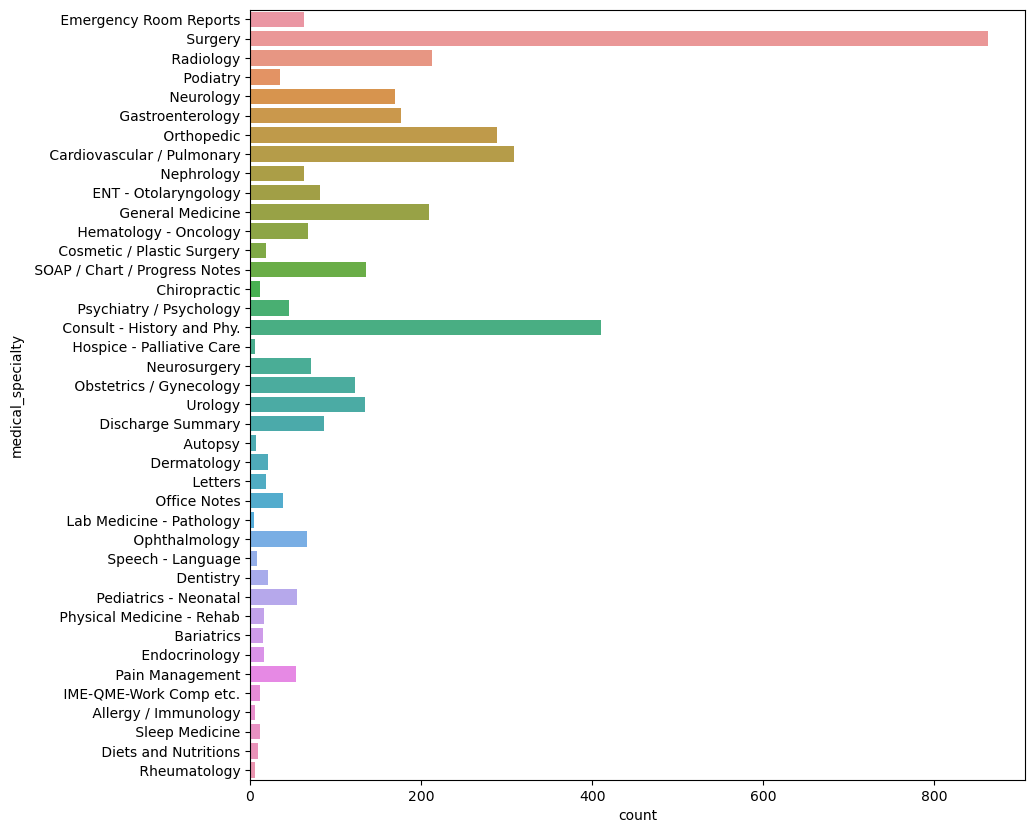

In [6]:
# Visualize the various specialties
plt.figure(figsize=(10,10))
sns.countplot(y='medical_specialty', data = train_df )
plt.show()

============Reduced Categories ======================
Cat:1  Cardiovascular / Pulmonary : 309
Cat:2  Consult - History and Phy. : 410
Cat:3  Discharge Summary : 87
Cat:4  ENT - Otolaryngology : 82
Cat:5  Emergency Room Reports : 63
Cat:6  Gastroenterology : 176
Cat:7  General Medicine : 209
Cat:8  Hematology - Oncology : 68
Cat:9  Nephrology : 63
Cat:10  Neurology : 170
Cat:11  Neurosurgery : 71
Cat:12  Obstetrics / Gynecology : 123
Cat:13  Ophthalmology : 67
Cat:14  Orthopedic : 289
Cat:15  Pain Management : 54
Cat:16  Pediatrics - Neonatal : 55
Cat:17  Radiology : 213
Cat:18  SOAP / Chart / Progress Notes : 135
Cat:19  Surgery : 863
Cat:20  Urology : 134
============ Reduced Categories ======================
                                          transcription  \
0     REASON FOR THE VISIT:,  Very high PT/INR.,HIST...   
1     PREOPERATIVE DIAGNOSIS:,  Acetabular fracture ...   
2     NAME OF PROCEDURE,1.  Selective coronary angio...   
3     REFERRING DIAGNOSIS: , Motor neuron di

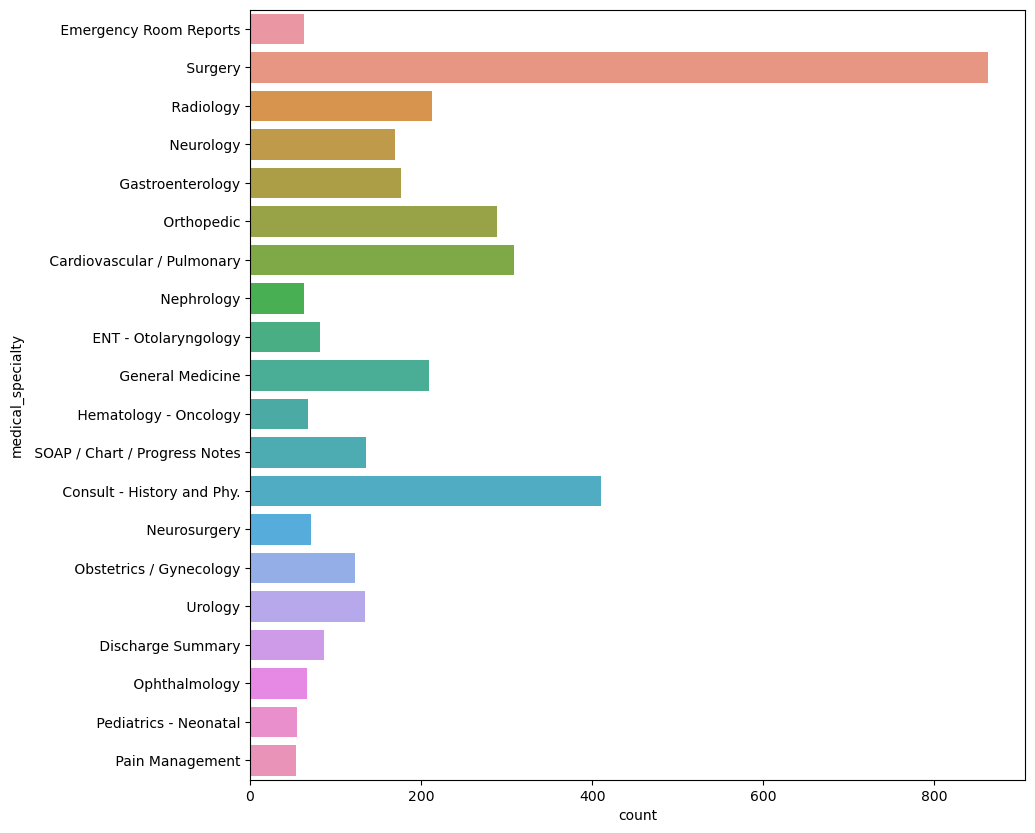

In [7]:
# Filter categories so that we have the most common ones
filtered_data_categories = data_categories.filter(lambda x:x.shape[0] > 50)
final_data_categories = filtered_data_categories.groupby(filtered_data_categories['medical_specialty'])
i=1
print('============Reduced Categories ======================')
for catName,dataCategory in final_data_categories:
    print('Cat:'+str(i)+' '+catName + ' : '+ str(len(dataCategory)) )
    i = i+1

print('============ Reduced Categories ======================')
data = filtered_data_categories[['transcription', 'medical_specialty']]
data = data.drop(data[data['transcription'].isna()].index)
print(data)
plt.figure(figsize=(10,10))

sns.countplot(y='medical_specialty', data = filtered_data_categories )
plt.show()

In [8]:
# Map and vectorize the transcriptions based on key words to fit our model
vectorizer = TfidfVectorizer(analyzer='word', stop_words='english',ngram_range=(1,3), max_df=0.75, use_idf=True, smooth_idf=True, max_features=1000)
tfIdfMat  = vectorizer.fit_transform(data['transcription'].tolist() )
feature_names = sorted(vectorizer.get_feature_names())
print(feature_names)

['000', '07', '08', '10', '10 mg', '100', '11', '12', '13', '14', '15', '15 blade', '16', '17', '18', '19', '20', '20 mg', '2007', '2008', '22', '24', '25', '26', '30', '40', '50', '60', '70', '80', '90', '95', 'abc', 'abdomen', 'abdomen soft', 'abdomen soft nontender', 'abdominal', 'abdominal pain', 'able', 'abnormal', 'abnormalities', 'achieved', 'active', 'activity', 'acute', 'acute distress', 'addition', 'additional', 'adequate', 'adhesions', 'administered', 'admission', 'admitted', 'advanced', 'age', 'ago', 'air', 'alcohol', 'alert', 'alert oriented', 'allergies', 'allergies known', 'anastomosis', 'anemia', 'anesthesia', 'anesthesia general', 'anesthesia general endotracheal', 'anesthetic', 'ankle', 'anterior', 'anterior descending', 'anteriorly', 'antibiotic', 'antibiotics', 'aorta', 'aortic', 'appear', 'appearance', 'appeared', 'appearing', 'appears', 'applied', 'appropriate', 'approximately', 'approximately cm', 'area', 'areas', 'arm', 'artery', 'artery disease', 'asked', 'aspe

/Users/jaimil.d/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


/Users/jaimil.d/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/jaimil.d/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


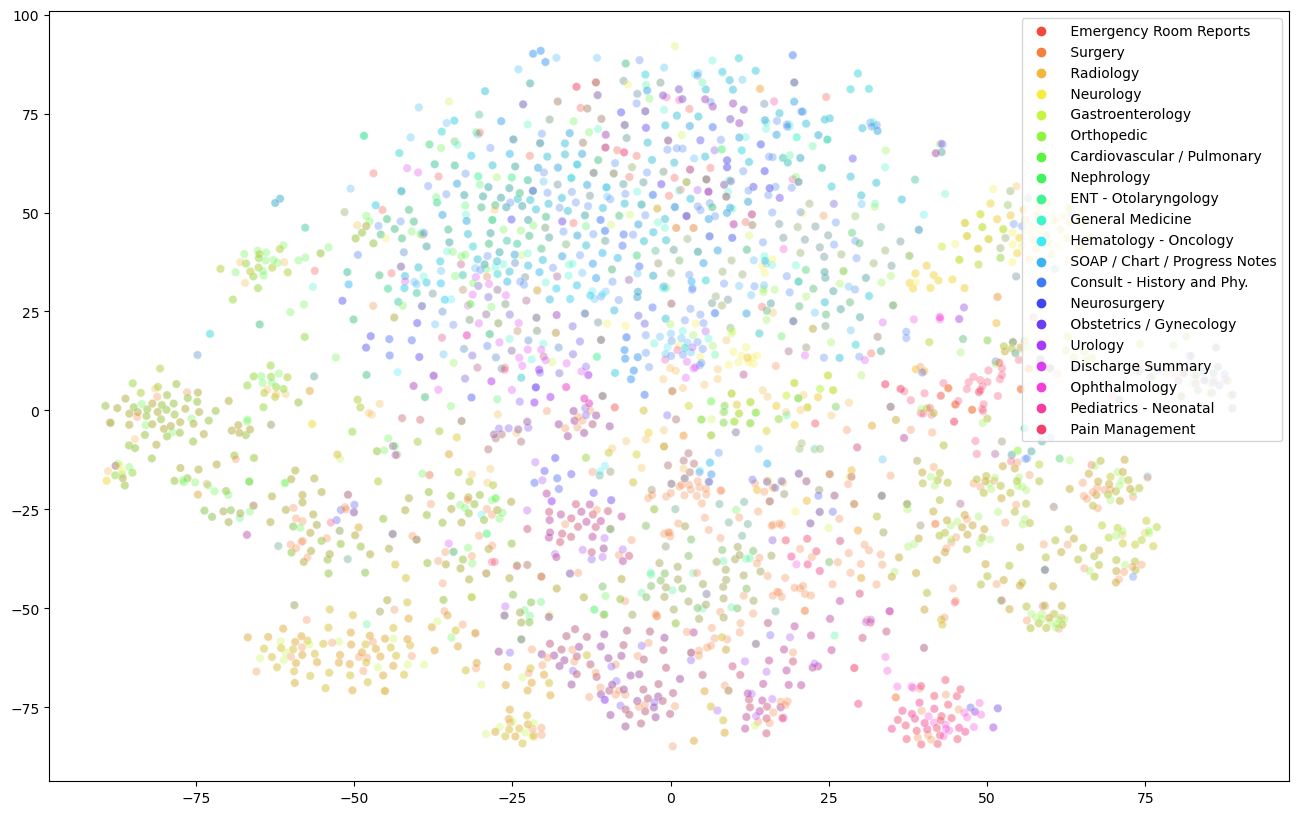

In [9]:
# Scatter Plot to show relation of medical specialty to keywords
import gc
gc.collect()
tfIdfMatrix = tfIdfMat.todense()
labels = data['medical_specialty'].tolist()
tsne_results = TSNE(n_components=2,init='random',random_state=0, perplexity=40).fit_transform(tfIdfMatrix)
plt.figure(figsize=(16,10))
palette = sns.hls_palette(20, l=.6, s=.9)
sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue=labels,
    palette= palette,
    legend="full",
    alpha=0.3
)
plt.show()

# Our Model: Logistic Regression Model

In [10]:
# Split train and test data to train our model
gc.collect()
pca = PCA(n_components=0.95)
tfIdfMat_reduced = pca.fit_transform(tfIdfMat.toarray())

labels = data['medical_specialty'].tolist()
category_list = data.medical_specialty.unique()

X_train, X_test, y_train, y_test = train_test_split(tfIdfMat_reduced, labels, stratify=labels,random_state=1)   

In [11]:
# Create Model
model = LogisticRegression(penalty= 'elasticnet', solver= 'saga', l1_ratio=0.5, random_state=1).fit(X_train, y_train)
y_test_pred= model.predict(X_test)

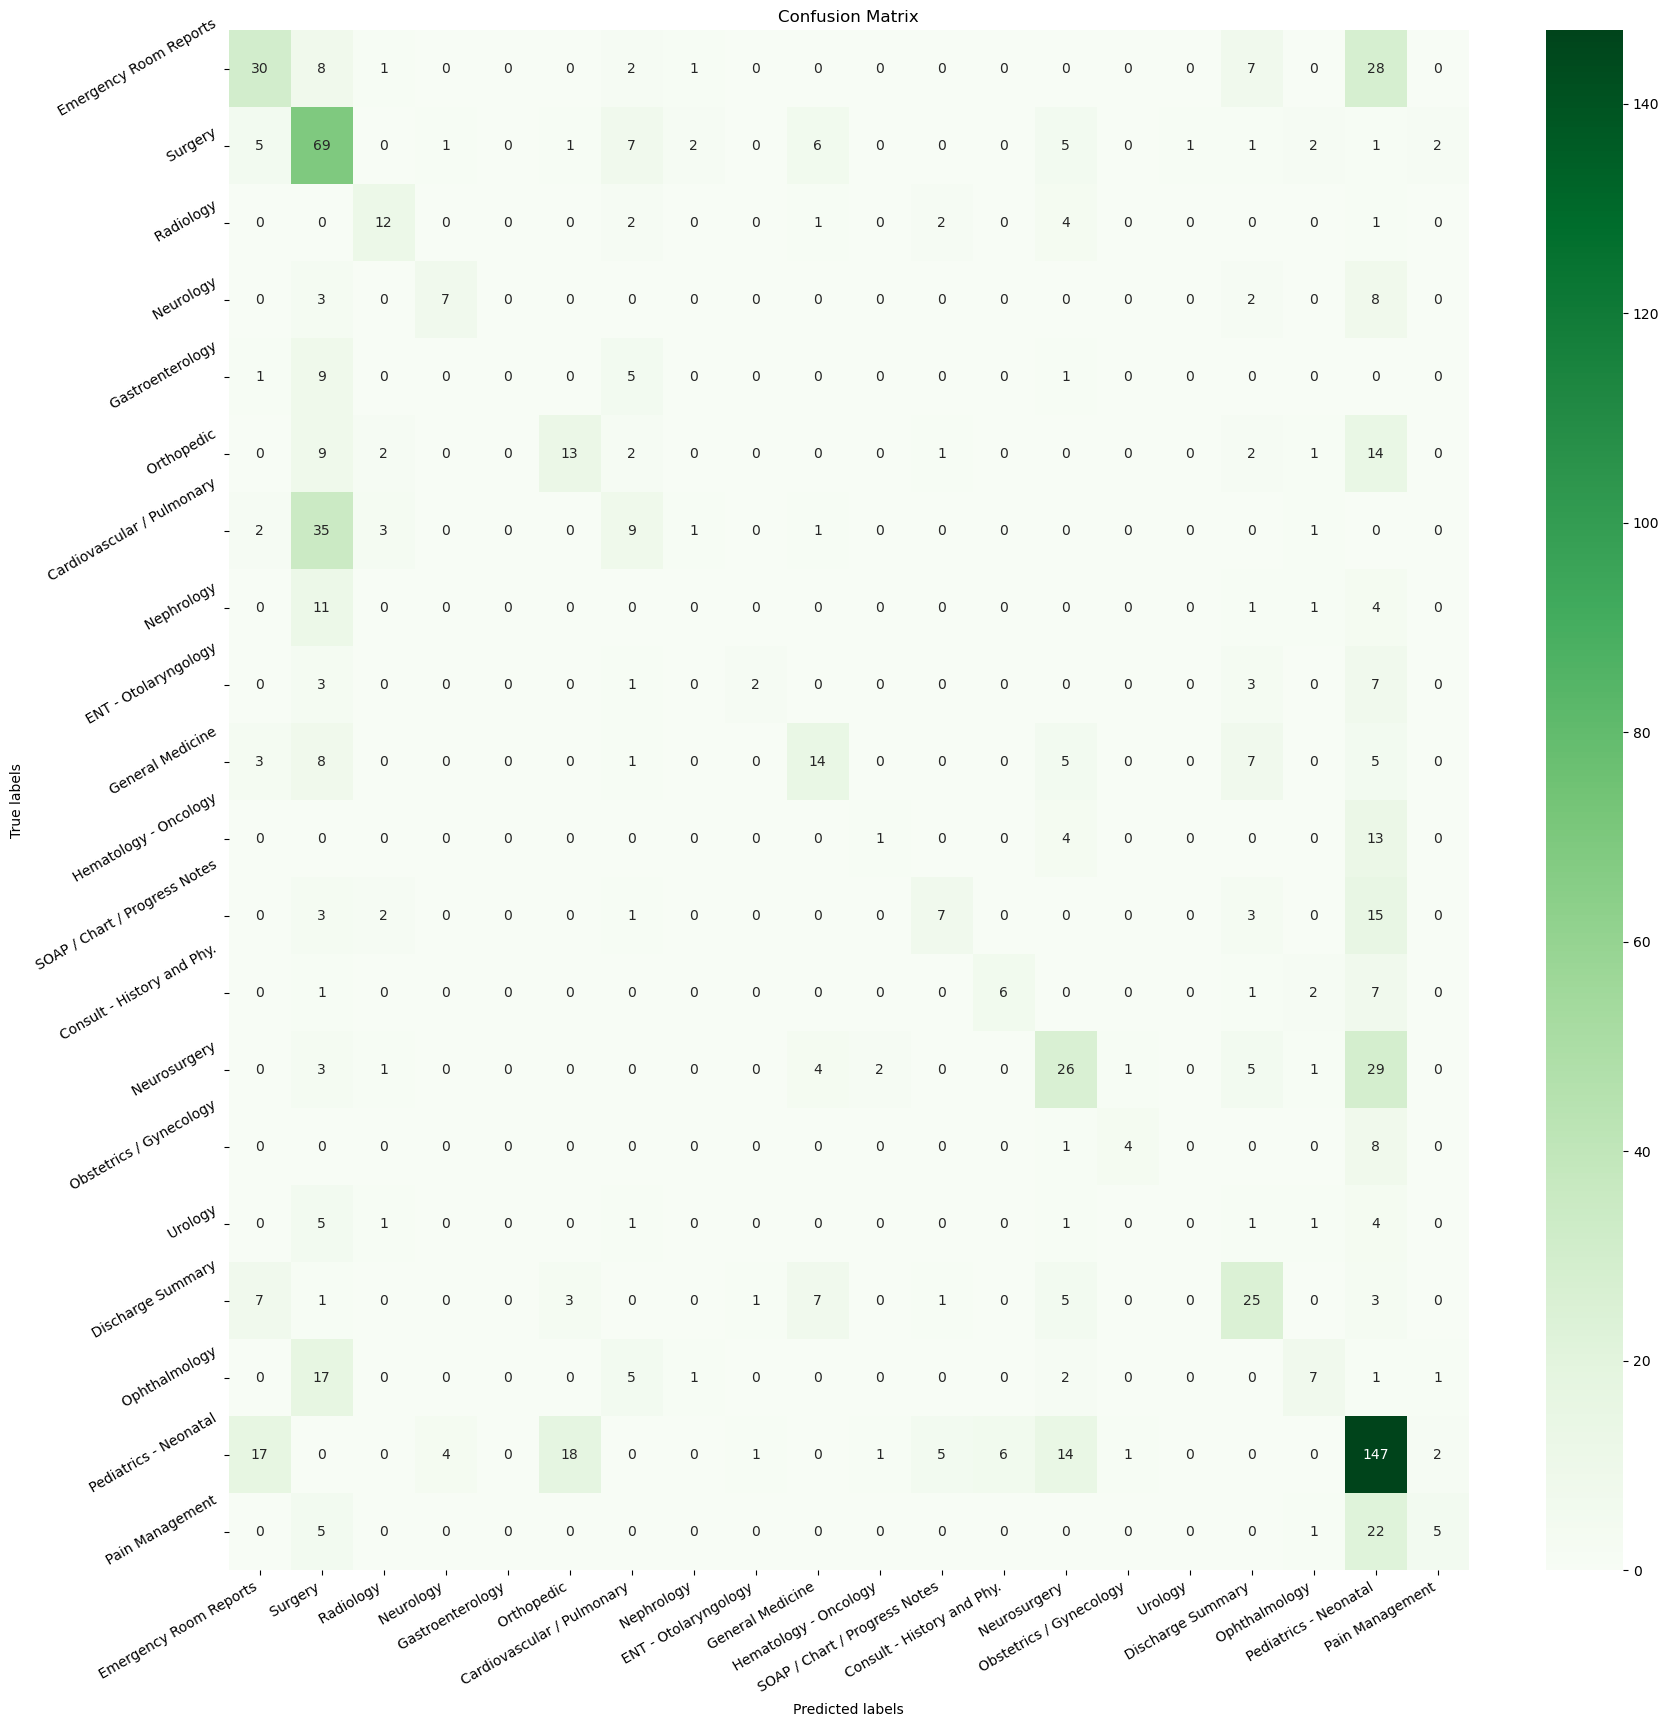

In [12]:
# Show confusion matrix based on model and predictions
labels = category_list
cm = confusion_matrix(y_test, y_test_pred)

fig = plt.figure(figsize=(20,20))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Greens",ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()

In [13]:
# Show f1-score of model
print(classification_report(y_test,y_test_pred,labels=category_list,zero_division=0))


                                precision    recall  f1-score   support

        Emergency Room Reports       0.00      0.00      0.00        16
                       Surgery       0.46      0.68      0.55       216
                     Radiology       0.43      0.47      0.45        53
                     Neurology       0.42      0.33      0.37        43
              Gastroenterology       0.37      0.30      0.33        44
                    Orthopedic       0.38      0.36      0.37        72
    Cardiovascular / Pulmonary       0.46      0.39      0.42        77
                    Nephrology       0.50      0.12      0.20        16
          ENT - Otolaryngology       0.58      0.35      0.44        20
              General Medicine       0.25      0.17      0.20        52
         Hematology - Oncology       0.00      0.00      0.00        17
 SOAP / Chart / Progress Notes       0.41      0.21      0.27        34
    Consult - History and Phy.       0.36      0.67      0.47  

In [14]:
# Use model to make predictions for given test set
tfIdfMat_testset = vectorizer.fit_transform(test_df['transcription'].tolist())
tfIdfMat_reduced_testset = pca.transform(tfIdfMat_testset.toarray())
print(tfIdfMat_reduced_testset.shape)
pred_y = model.predict(tfIdfMat_reduced_testset)
a = pd.Series(pred_y)

converter = {' Surgery':1, ' Consult - History and Phy.':16, ' Cardiovascular / Pulmonary':7,
             ' Radiology':2, ' Orthopedic':6, 
             ' Gastroenterology':5, ' SOAP / Chart / Progress Notes': 13,
             ' Neurology':4}
print(a[0])
np.vectorize(converter.get)(a)
print(a)
a.name = "Expected"
a.to_csv("predictions.csv")
a.value_counts()

(997, 602)
 Surgery
0       Surgery
1       Surgery
2       Surgery
3       Surgery
4       Surgery
         ...   
992     Surgery
993     Surgery
994     Surgery
995     Surgery
996     Surgery
Length: 997, dtype: object


 Surgery                          910
 Consult - History and Phy.        28
 Cardiovascular / Pulmonary        23
 Radiology                         17
 Orthopedic                        13
 Gastroenterology                   3
 SOAP / Chart / Progress Notes      2
 Neurology                          1
Name: Expected, dtype: int64